<a href="https://colab.research.google.com/github/shathatalalALsulime/Data-analysis-projects/blob/main/Copy_of_textproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install emoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import nltk
import re
import string
import emoji
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# Display information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
#Descriptive
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [ ]:
#Number of score results
df['Score'].value_counts()

,count
Score,
5,363122
4,80655
1,52268
3,42640
2,29769


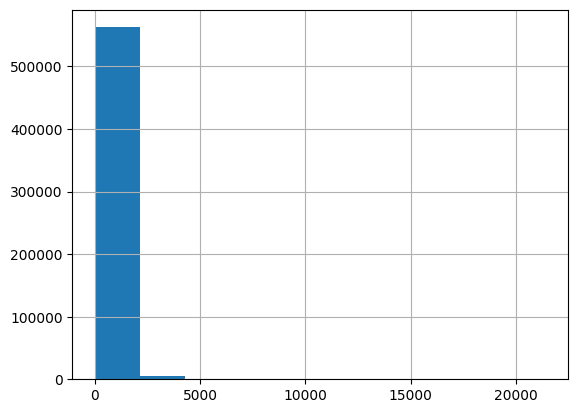

In [ ]:
#Create a column for the review
if 'review' not in df.columns:
    df.rename(columns={'Text': 'review'}, inplace=True)
    df['review'].str.len().hist()

In [ ]:
#Apply sentiments to the review
def analyze_sentiment(review):
    analysis = TextBlob(review)

In [ ]:
# Show results
print(df[['review']].head())

                                              review
0  I have bought several of the Vitality canned d...
1  Product arrived labeled as Jumbo Salted Peanut...
2  This is a confection that has been around a fe...
3  If you are looking for the secret ingredient i...
4  Great taffy at a great price.  There was a wid...


<Axes: >

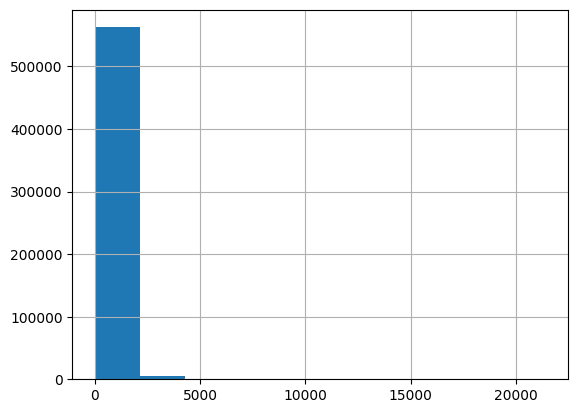

In [ ]:
#Convert review to string
df['review'] = df['review'].apply(lambda x: str(x))
df.rename(columns={'Text':'review'}, inplace=True)
df['review'].str.len().hist()

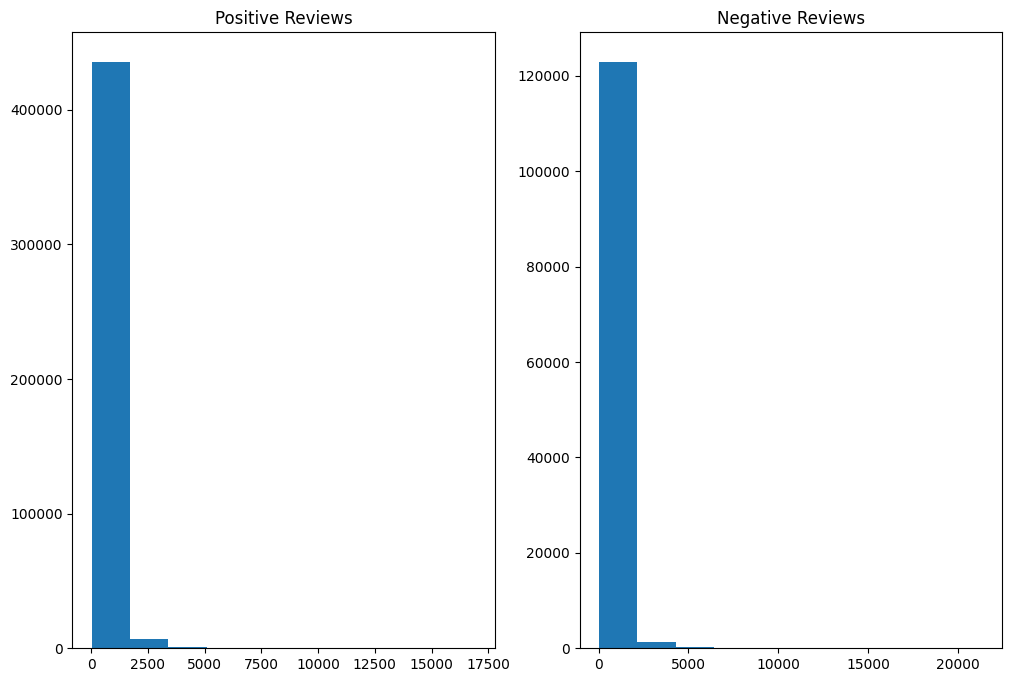

In [ ]:
# Classify reviews into positive and negative
df['sentiment'] = df['Score'].apply(lambda rating: 'positive' if rating > 3 else 'negative')

# Distribution of positive and negative reviews
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.hist(df[df['sentiment'] == 'positive']['review'].str.len())
ax1.set_title('Positive Reviews')
ax2.hist(df[df['sentiment'] == 'negative']['review'].str.len())
ax2.set_title('Negative Reviews')
plt.show()

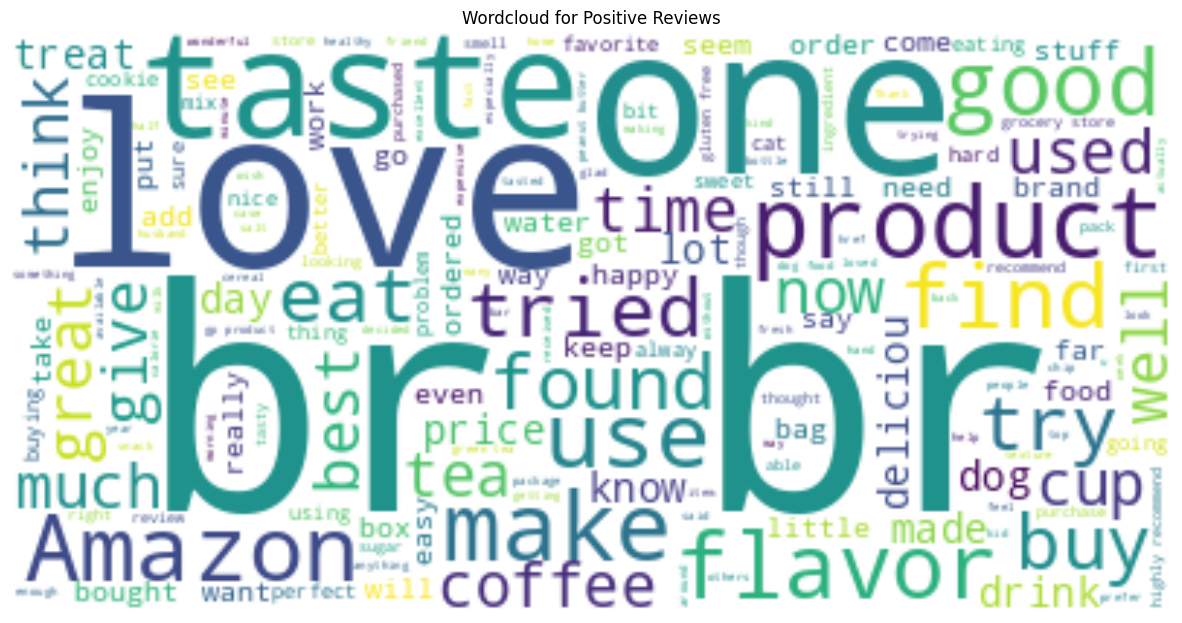

In [ ]:
#Cloud for positive words
text = " ".join(str(review) for review in df[df['sentiment']=='positive']['review']) # Convert each review to a string before joining
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for Positive Reviews')
plt.show()

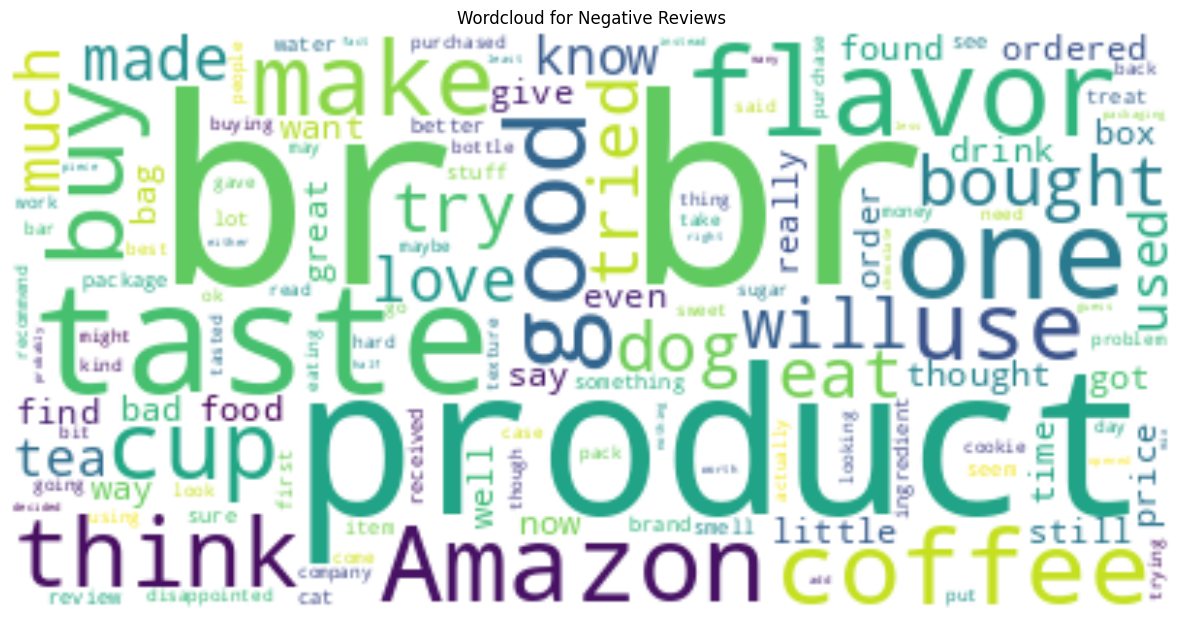

In [ ]:
#Cloud for negative words
text = " ".join(str(review) for review in df[df['sentiment']=='negative']['review']) # Convert each review to a string before joining
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for Negative Reviews')
plt.show()

In [ ]:
# Text cleaning function
def cleaning(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r"\b\d+\b", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
#Emoji description
    text = emoji.demojize(text)

    text = re.sub("isn't",'is not',text)
    text = re.sub("he's",'he is',text)


    return text

# Apply cleaning to reviews
df['cleaned_text'] = df['review'].apply(cleaning)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review,sentiment,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,great taffy at a great price there was a wide...


In [ ]:
# Remove common words
stop_words = set(stopwords.words('english'))
df['no_sw'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Show most frequently used words
from collections import Counter
cnt = Counter()
for text in df['no_sw'].values:
    for word in text.split():
        cnt[word] += 1
temp = pd.DataFrame(cnt.most_common(10))
temp.columns = ['word', 'count']
px.bar(temp, x="count", y="word", title='Common Words in Text', orientation='h', width=700, height=700)

In [ ]:
# Remove most frequent words
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df['wo_stopfreq'] = df['no_sw'].apply(lambda text: remove_freqwords(text))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review,sentiment,cleaned_text,no_sw,wo_stopfreq
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...,arrived labeled jumbo salted peanutsthe peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,this is a confection that has been around a fe...,confection around centuries light pillowy citr...,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,great taffy at a great price there was a wide...,great taffy great price wide assortment yummy ...,taffy price wide assortment yummy taffy delive...


In [ ]:
#Return the word to its root
nltk.download('wordnet')
wordnet_lem = WordNetLemmatizer()

df['wo_stopfreq_lem'] = df['wo_stopfreq'].apply(wordnet_lem.lemmatize)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,review,sentiment,cleaned_text,no_sw,wo_stopfreq,wo_stopfreq_lem
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,i have bought several of the vitality canned d...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,product arrived labeled as jumbo salted peanut...,product arrived labeled jumbo salted peanutsth...,arrived labeled jumbo salted peanutsthe peanut...,arrived labeled jumbo salted peanutsthe peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,this is a confection that has been around a fe...,confection around centuries light pillowy citr...,confection around centuries light pillowy citr...,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,if you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,great taffy at a great price there was a wide...,great taffy great price wide assortment yummy ...,taffy price wide assortment yummy taffy delive...,taffy price wide assortment yummy taffy delive...


In [ ]:
# Convert sentiment to 0 and 1 (0 for negative and 1 for positive)
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

In [ ]:
# Split data tokenize
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize)

# Ensure that column 'wo_stopfreq_lem' exists in DataFrame
if 'wo_stopfreq_lem' in df.columns:
    text_counts = cv.fit_transform(df['wo_stopfreq_lem'])
else:
    print("Column 'wo_stopfreq_lem' does not exist in the DataFrame.")

X = text_counts
y = df['sentiment']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# Create MultinomialNB model
model = MultinomialNB()

#Train the model
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


# Print results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70     24906
           1       0.91      0.94      0.92     88785

    accuracy                           0.88    113691
   macro avg       0.83      0.80      0.81    113691
weighted avg       0.87      0.88      0.87    113691

